# Week 6: Data Viz

## Seaborn

Check the official documentation at https://seaborn.pydata.org/

### Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Suppress warnings to avoid noise
import warnings
warnings.filterwarnings("ignore")

#### Data
Seaborn comes with built-in data sets!

In [8]:
tips = sns.load_dataset('tips')

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### distplot

The distplot shows the distribution of a univariate set of observations.

<Axes: xlabel='total_bill', ylabel='Density'>

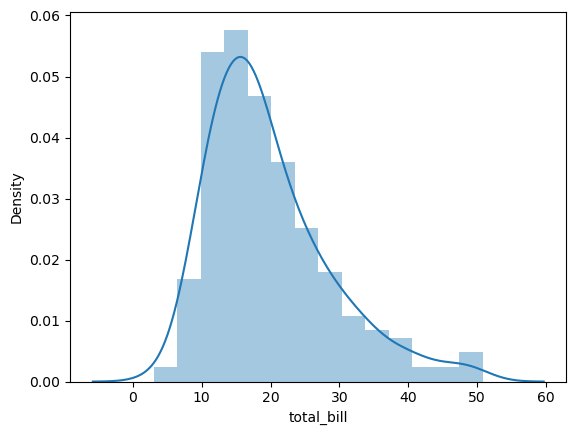

In [11]:
sns.distplot(tips['total_bill'])

To remove the kde layer and just have the histogram use:

<Axes: xlabel='total_bill'>

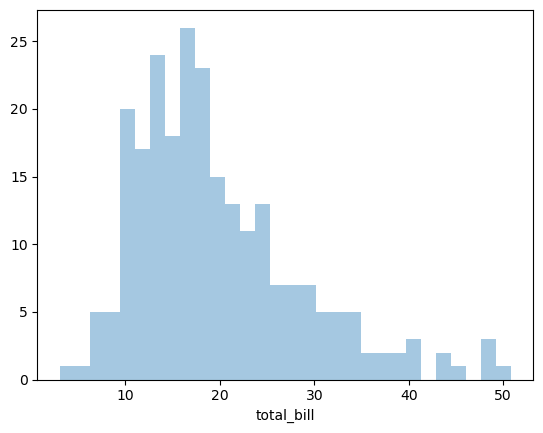

In [13]:
sns.distplot(tips['total_bill'],kde=False,bins=30) # remove the kernel distribution

#### jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

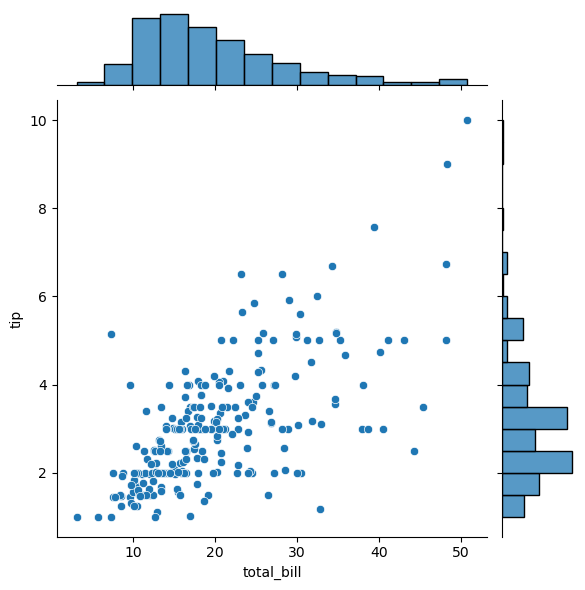

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

Kind allows you to specify the type of plot to visualize the relationship between two variables.
* Scatter: Creates a scatter plot of the two variables and each point represents an observation.
* Reg: Creates a scatter plot with an added regression line. The regression line shows the linear relationship between the two variables. A confidence interval for the regression line is typically included.
* Resid: Creates a residual plot that shows the residuals of a linear regression, which are the differences between observed and predicted values.
* Kde: Creates a Kernel Density Estimate (KDE) plot, that shows the joint distribution of the two variables using a smoothed, continuous estimate.
* Hex: Creates a hexbin plot. This plot shows the relationship between two variables by binning data points into hexagonal bins.

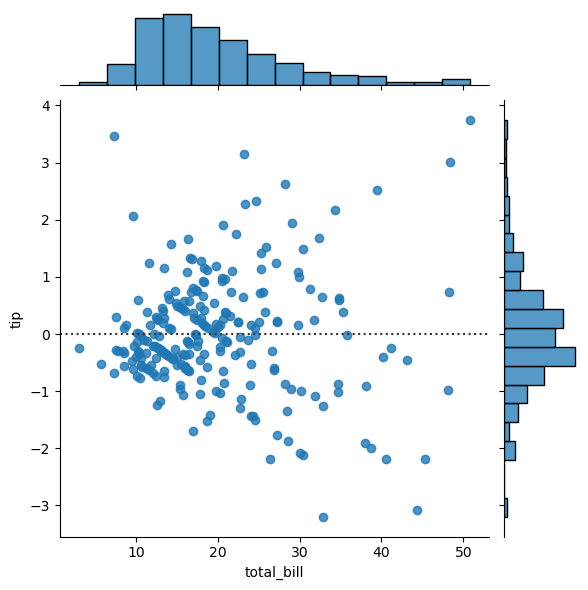

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='resid')

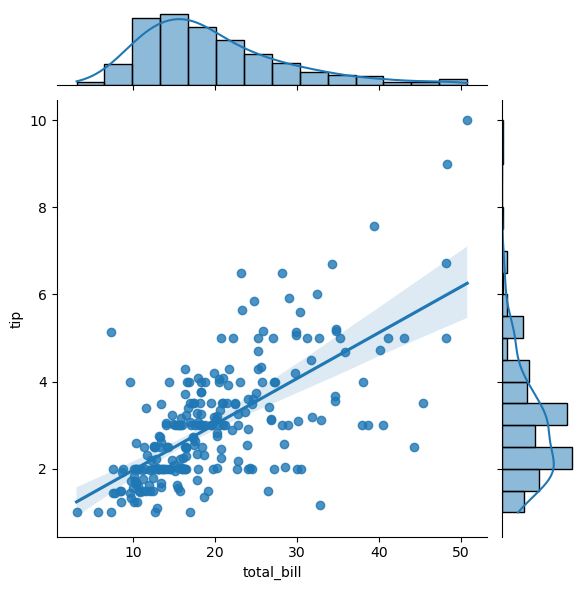

In [18]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

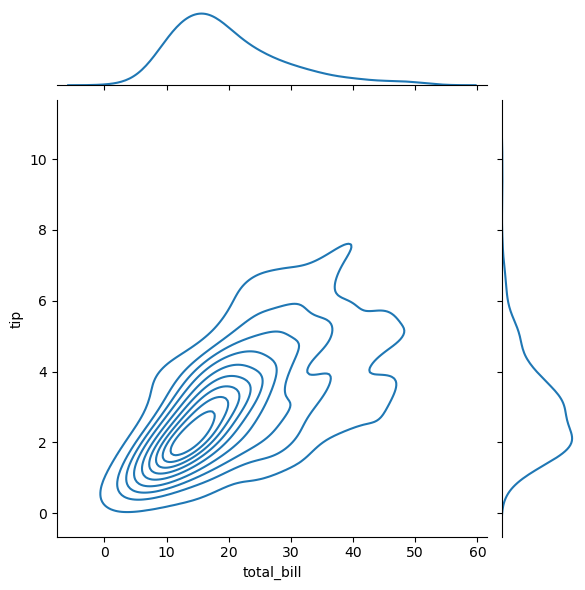

In [19]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

#### pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

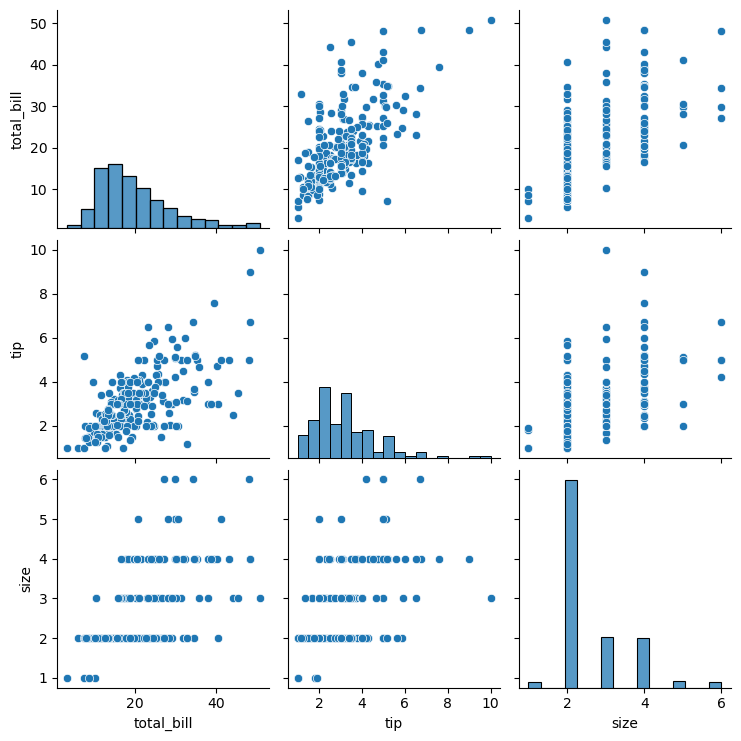

In [21]:
sns.pairplot(tips)

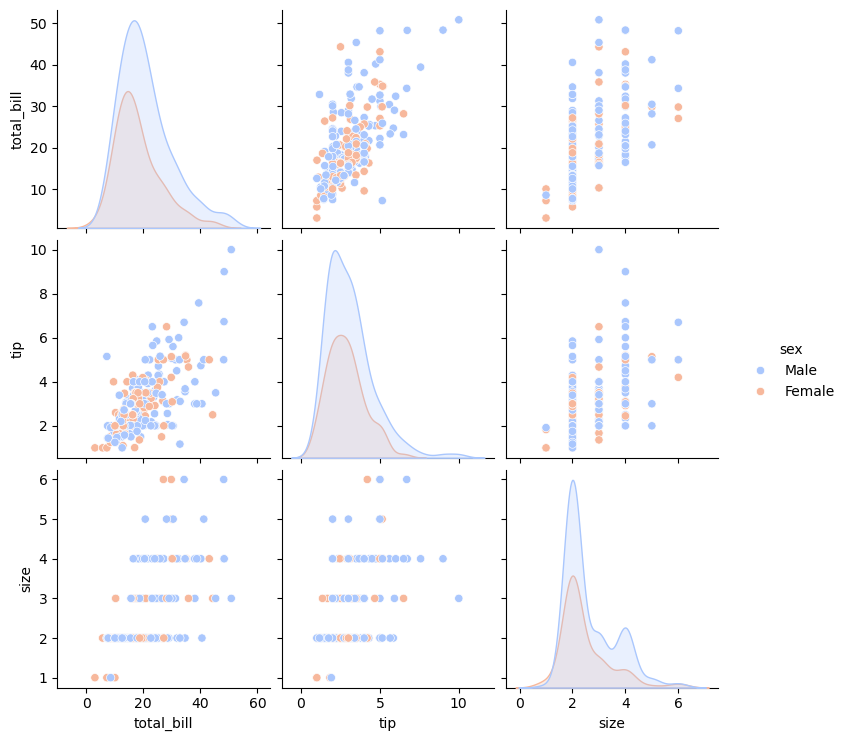

In [22]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

#### rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

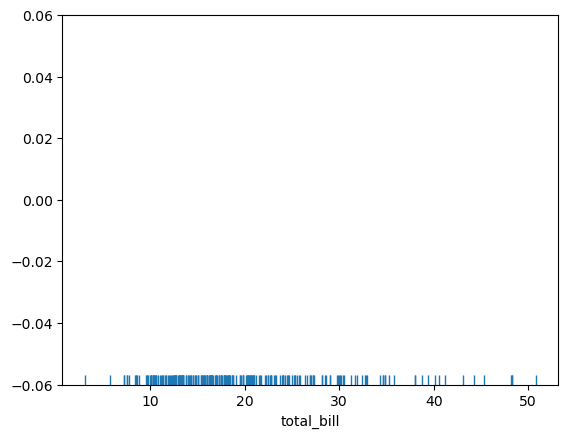

In [24]:
sns.rugplot(tips['total_bill'])

#### kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

<Axes: xlabel='total_bill', ylabel='Density'>

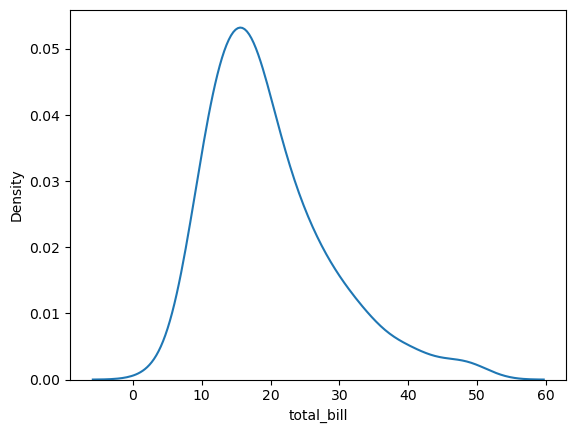

In [26]:
sns.kdeplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Density'>

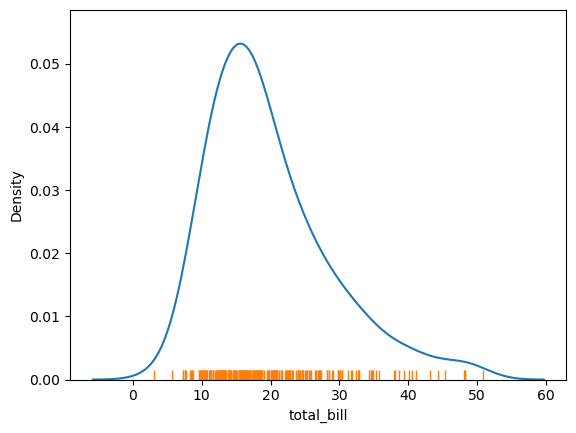

In [27]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<Axes: xlabel='tip', ylabel='Density'>

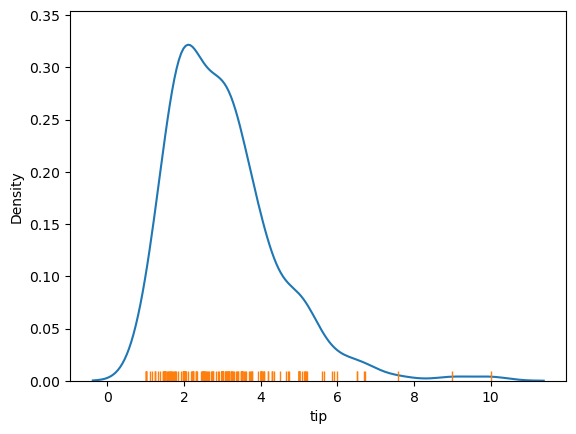

In [28]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

## Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

### barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

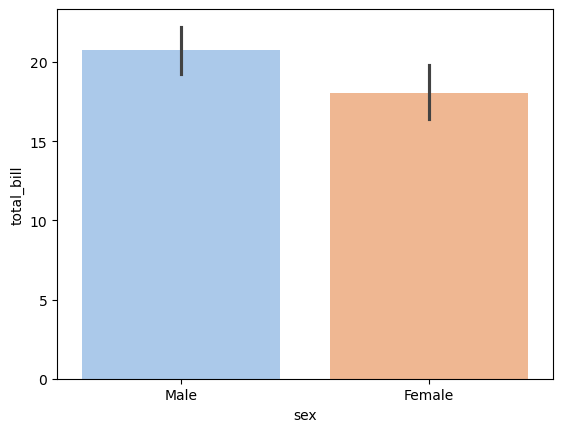

In [31]:
sns.barplot(x='sex',y='total_bill',data=tips, palette='pastel')

You can change the estimator object to your own function, that converts a vector to a scalar:

In [33]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

<Axes: xlabel='sex', ylabel='total_bill'>

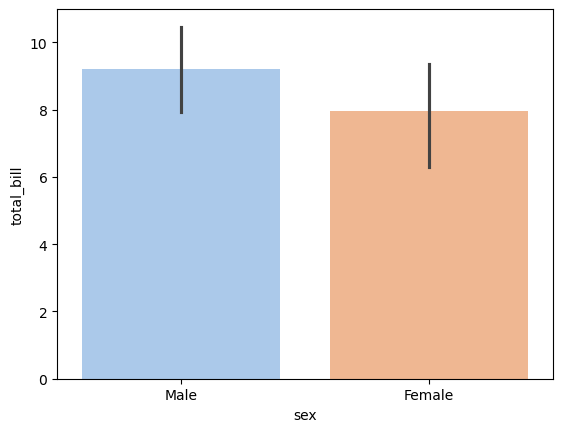

In [34]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std, palette='pastel')

#### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<Axes: xlabel='sex', ylabel='count'>

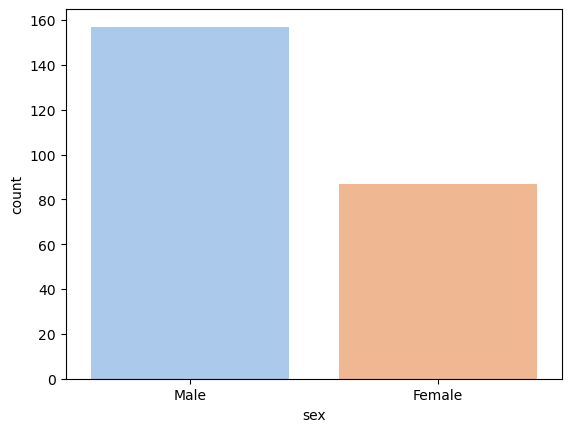

In [36]:
sns.countplot(x='sex',data=tips, palette='pastel')

### boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<Axes: xlabel='day', ylabel='total_bill'>

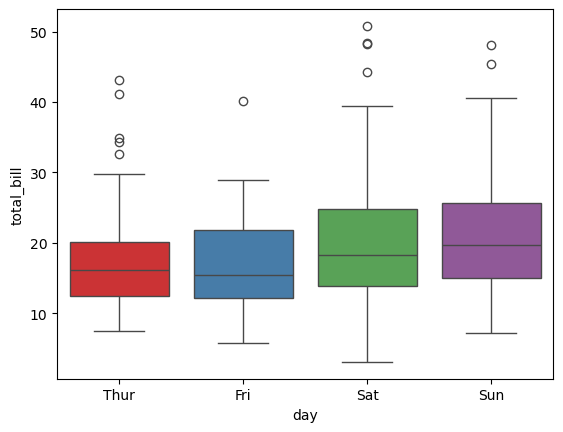

In [38]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='Set1')

<Axes: >

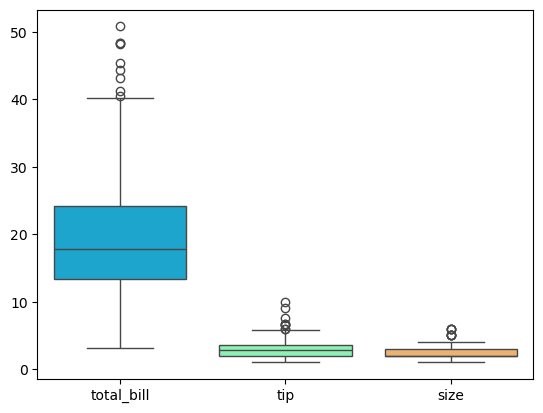

In [39]:
# Can do entire dataframe with horizontal orientation
sns.boxplot(data=tips,palette='rainbow',orient='v')

<Axes: xlabel='day', ylabel='total_bill'>

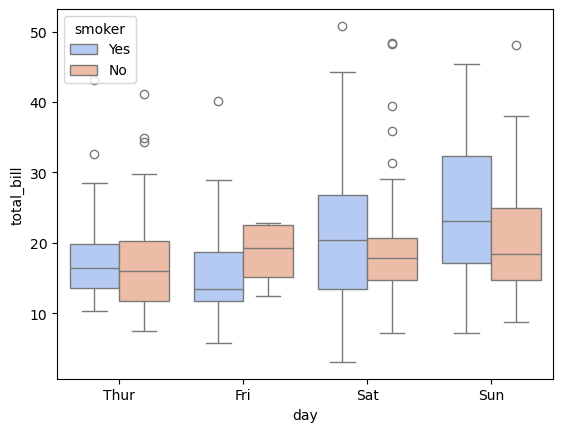

In [40]:
# plt.figure(figsize=(15, 12))
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

#### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<Axes: xlabel='day', ylabel='total_bill'>

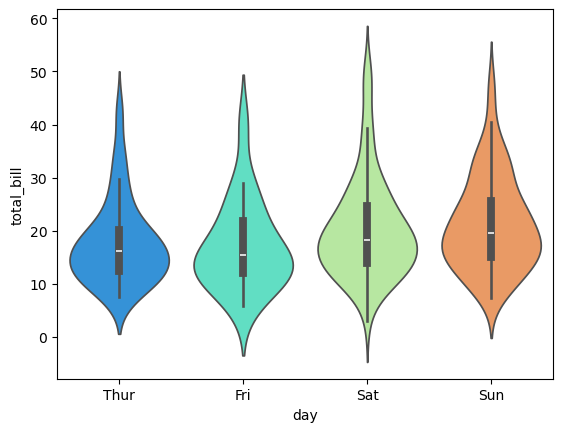

In [42]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

<Axes: xlabel='day', ylabel='total_bill'>

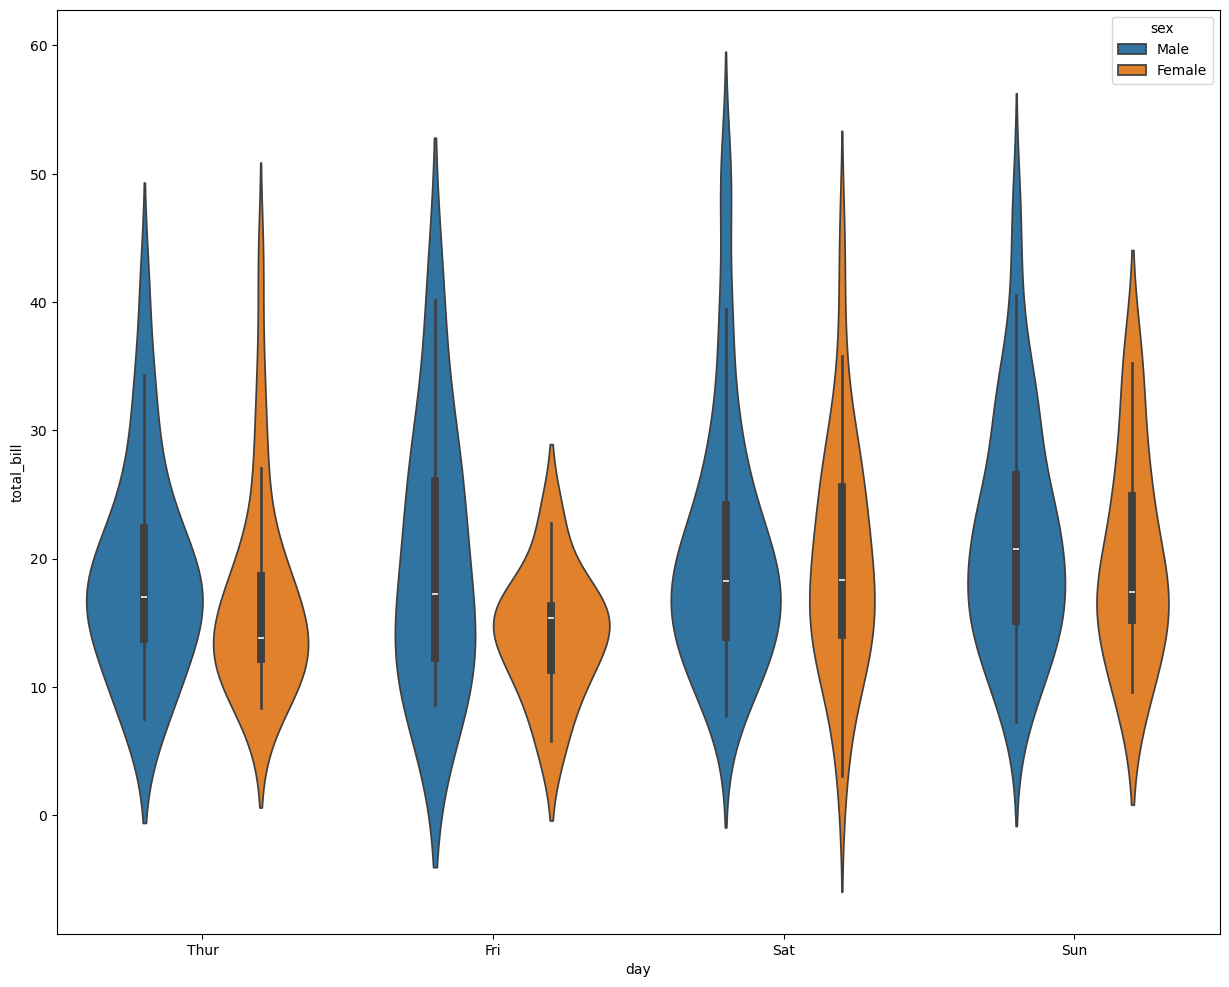

In [43]:
plt.figure(figsize=(15, 12))
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

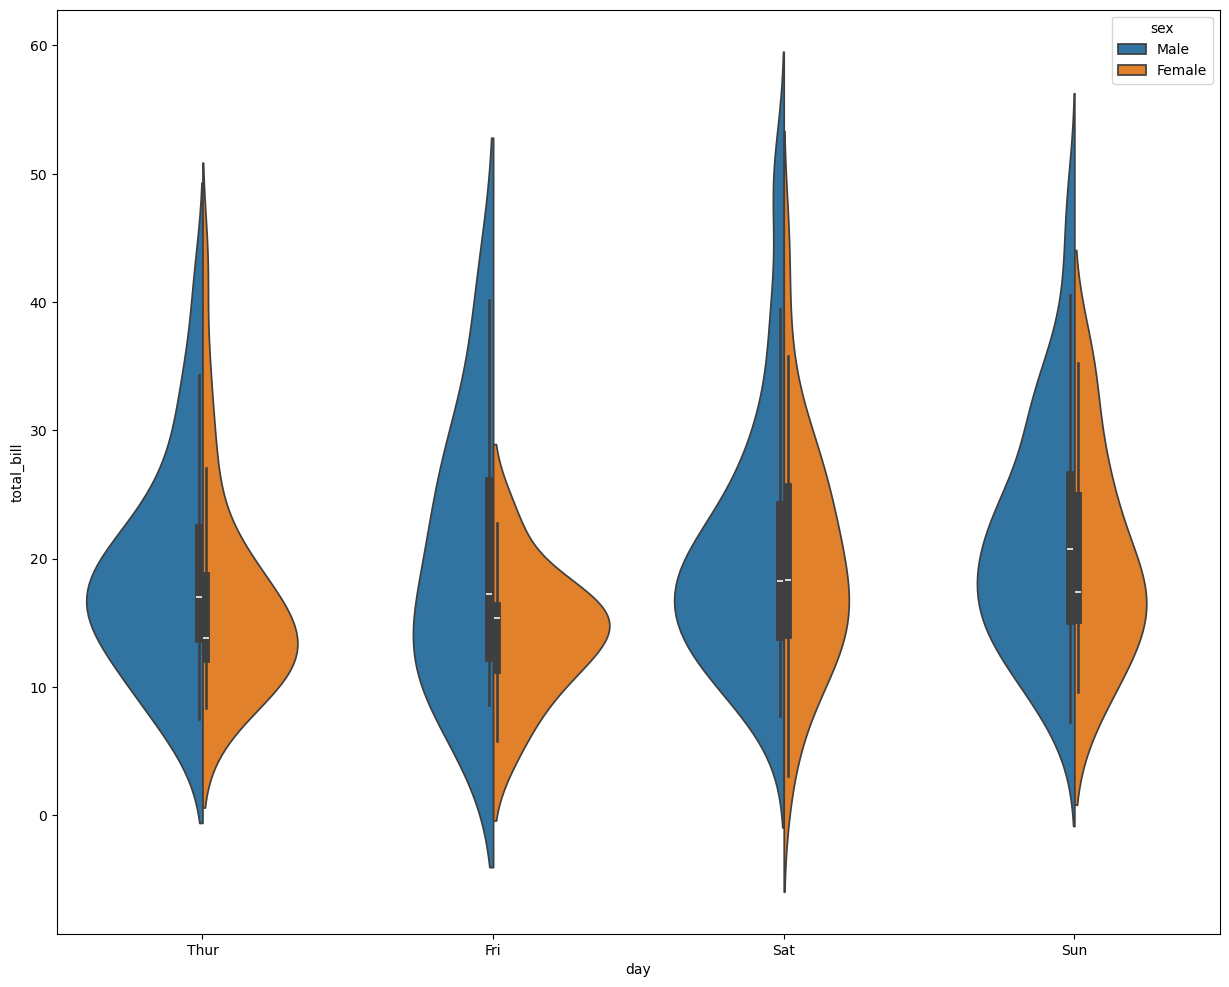

In [44]:
plt.figure(figsize=(15, 12))
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True)

### stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<Axes: xlabel='day', ylabel='total_bill'>

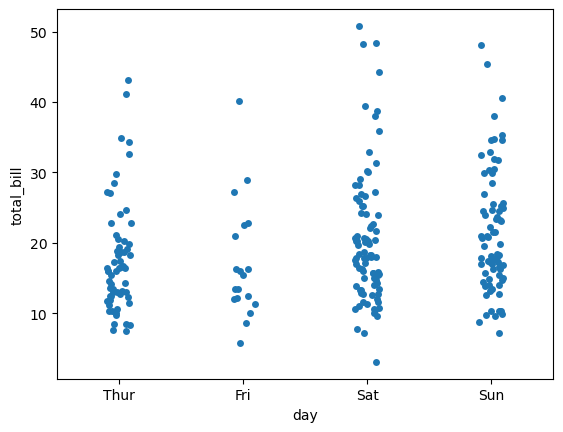

In [46]:
sns.stripplot(x="day", y="total_bill", data=tips)

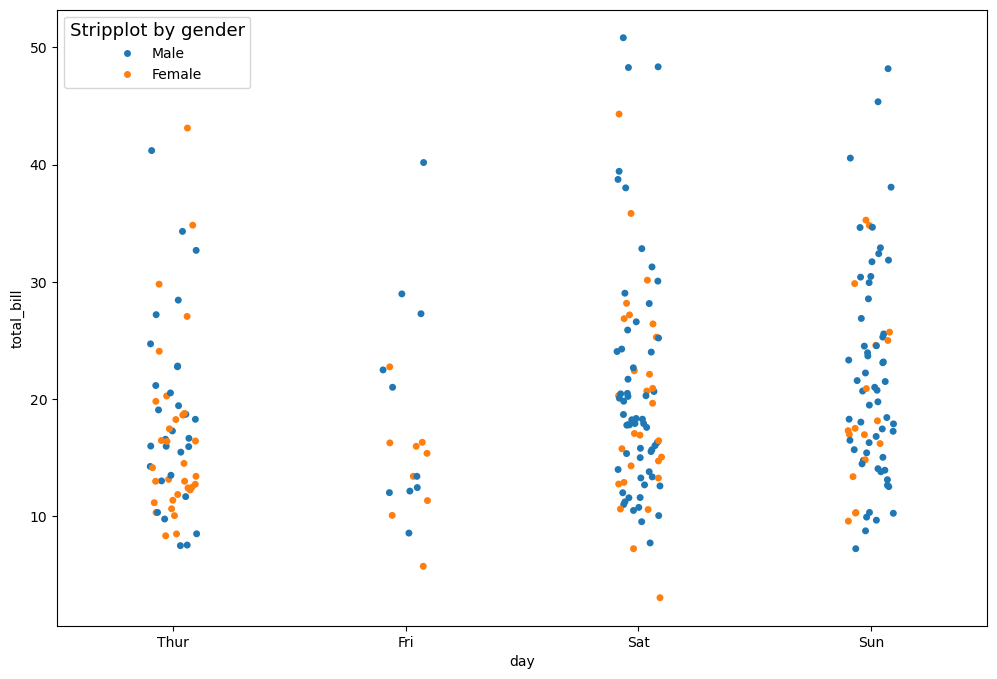

In [47]:
plt.figure(figsize=(12, 8))
sns.stripplot(x="day", y="total_bill", data=tips,hue='sex')
plt.legend(title='Stripplot by gender', title_fontsize='13', fontsize='10', loc='upper left')

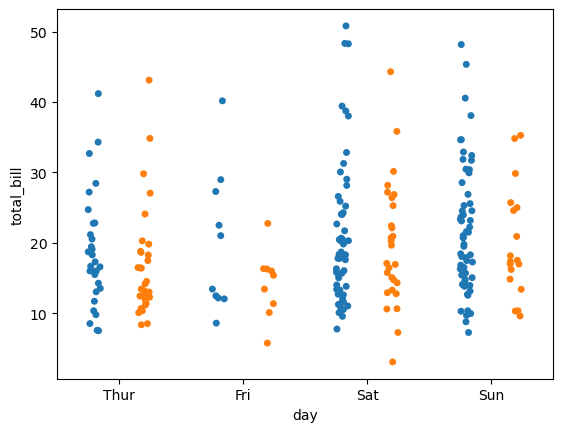

In [48]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='sex', dodge=True)
plt.legend().remove()

<Axes: xlabel='day', ylabel='total_bill'>

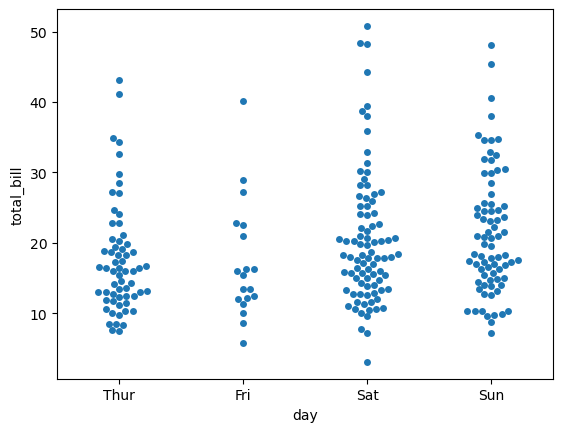

In [49]:
sns.swarmplot(x="day", y="total_bill", data=tips)

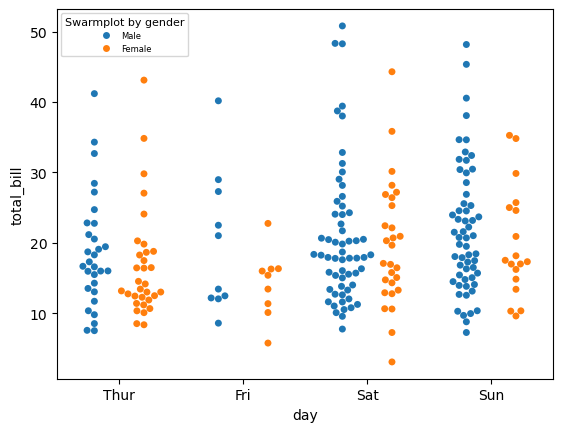

In [50]:
# plt.figure(figsize=(12, 8))
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, dodge=True)
plt.legend(title='Swarmplot by gender', title_fontsize='8', fontsize='6', loc='upper left')

#### Combining Categorical Plots

<Axes: xlabel='tip', ylabel='day'>

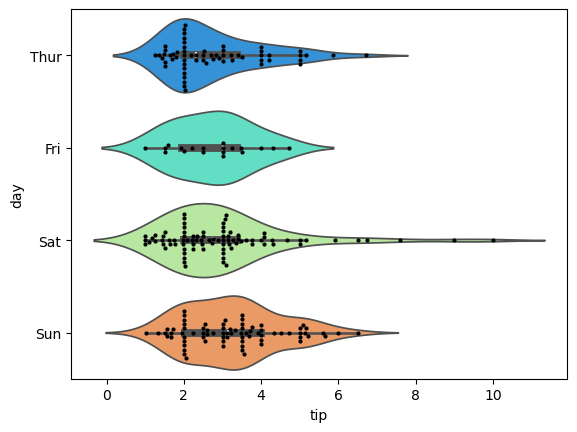

In [52]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

### Catplot

Catplot and factorplot are the most general forms of a categorical plot. They can take in a **kind** parameter to adjust the plot type:

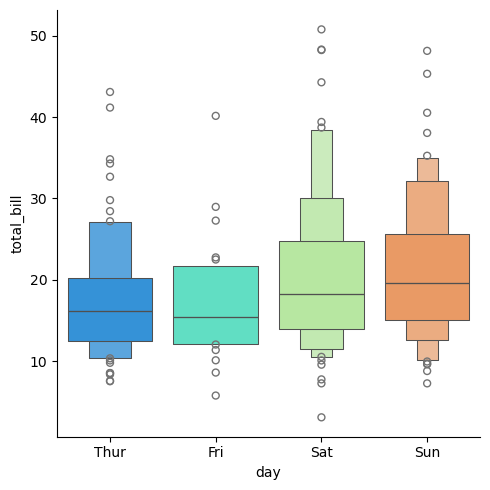

In [54]:
sns.catplot(x='day',y='total_bill',data=tips,kind='boxen',palette='rainbow') # kind options: box, point, bar, violin, strip, swarm, boxen

## Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [56]:
flights = sns.load_dataset('flights')

In [57]:
tips = sns.load_dataset('tips')

In [58]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [59]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [61]:
# Select only numeric columns for correlation calculation
numeric_tips = tips.select_dtypes(include=['number'])

# Calculate the correlation matrix
numeric_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

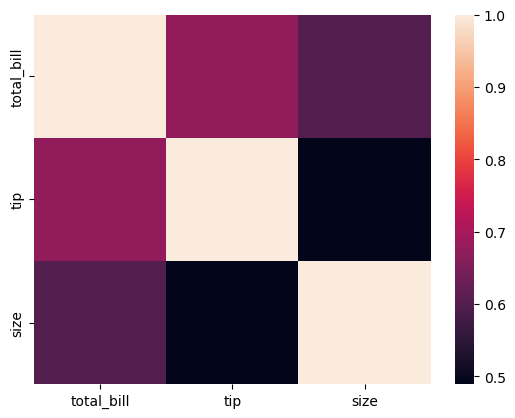

In [62]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(numeric_tips.corr())

<Axes: >

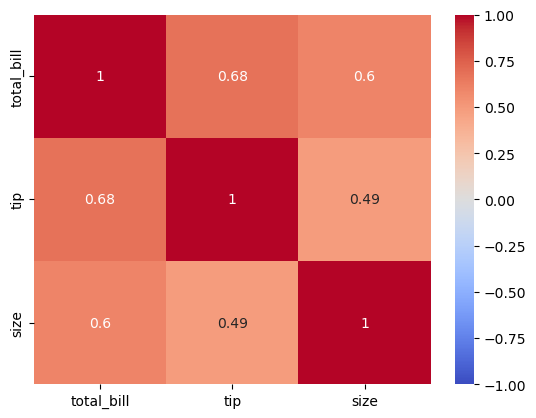

In [63]:
sns.heatmap(numeric_tips.corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1)

Or for the flights data:

In [65]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

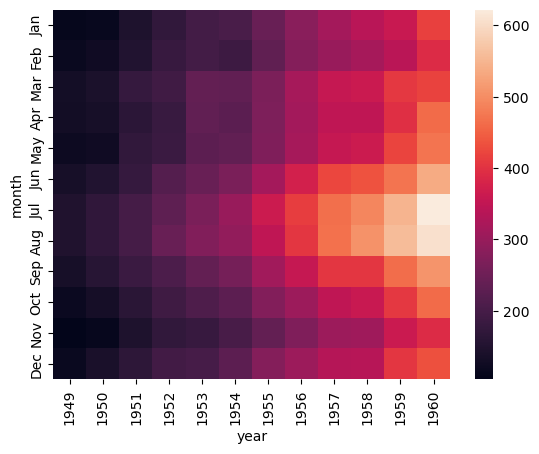

In [66]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

<Axes: xlabel='year', ylabel='month'>

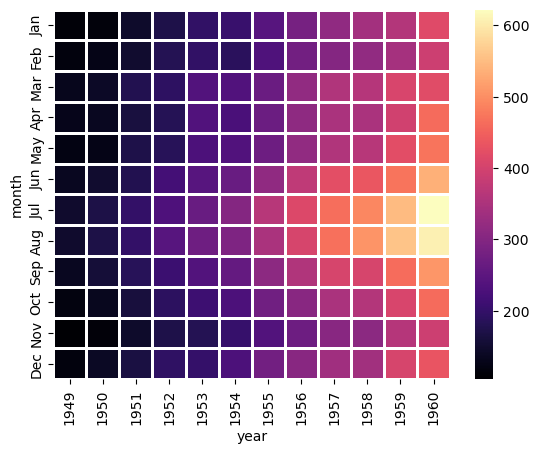

In [67]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

<Axes: xlabel='year', ylabel='month'>

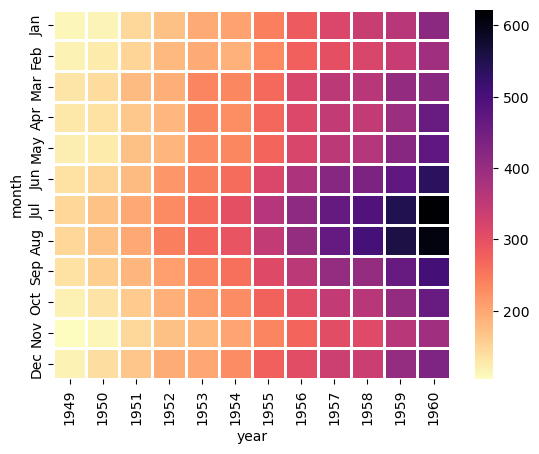

In [68]:
sns.heatmap(pvflights,cmap='magma_r',linecolor='white',linewidths=1)

### clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

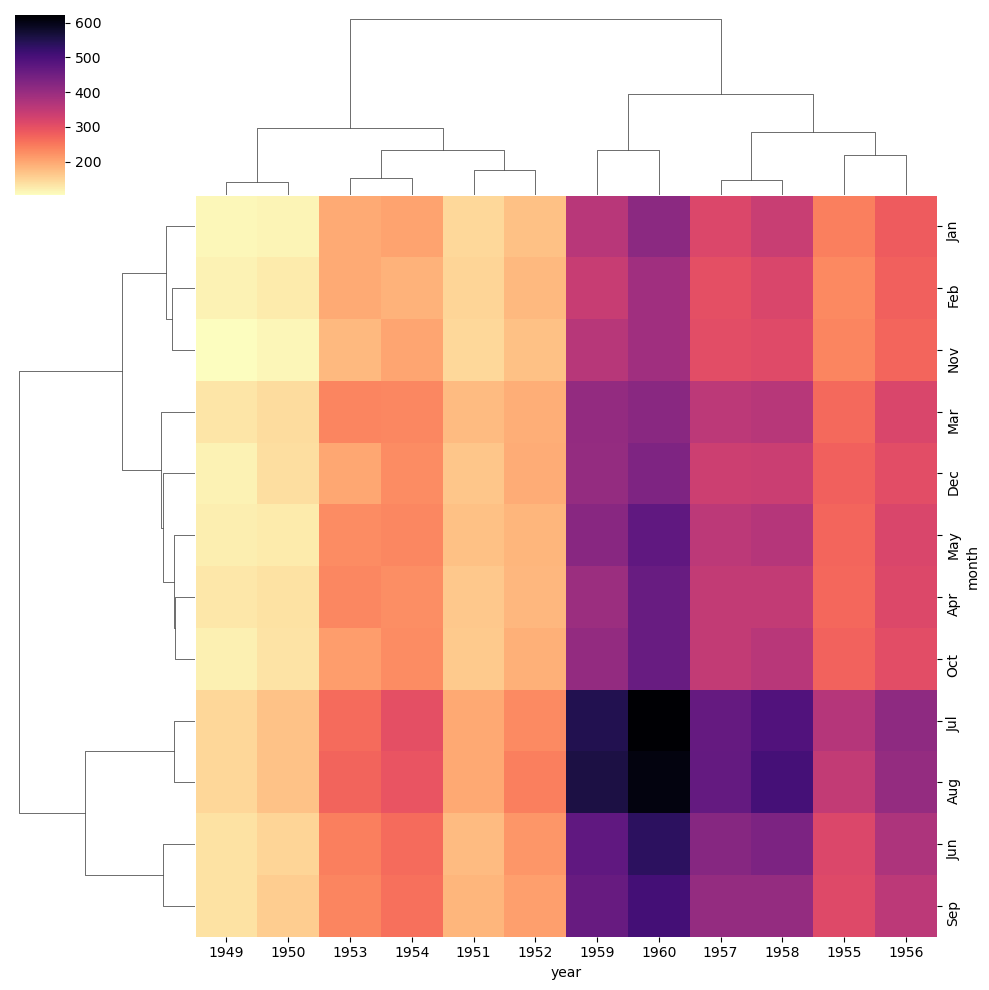

In [70]:
sns.clustermap(pvflights,cmap='magma_r')

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

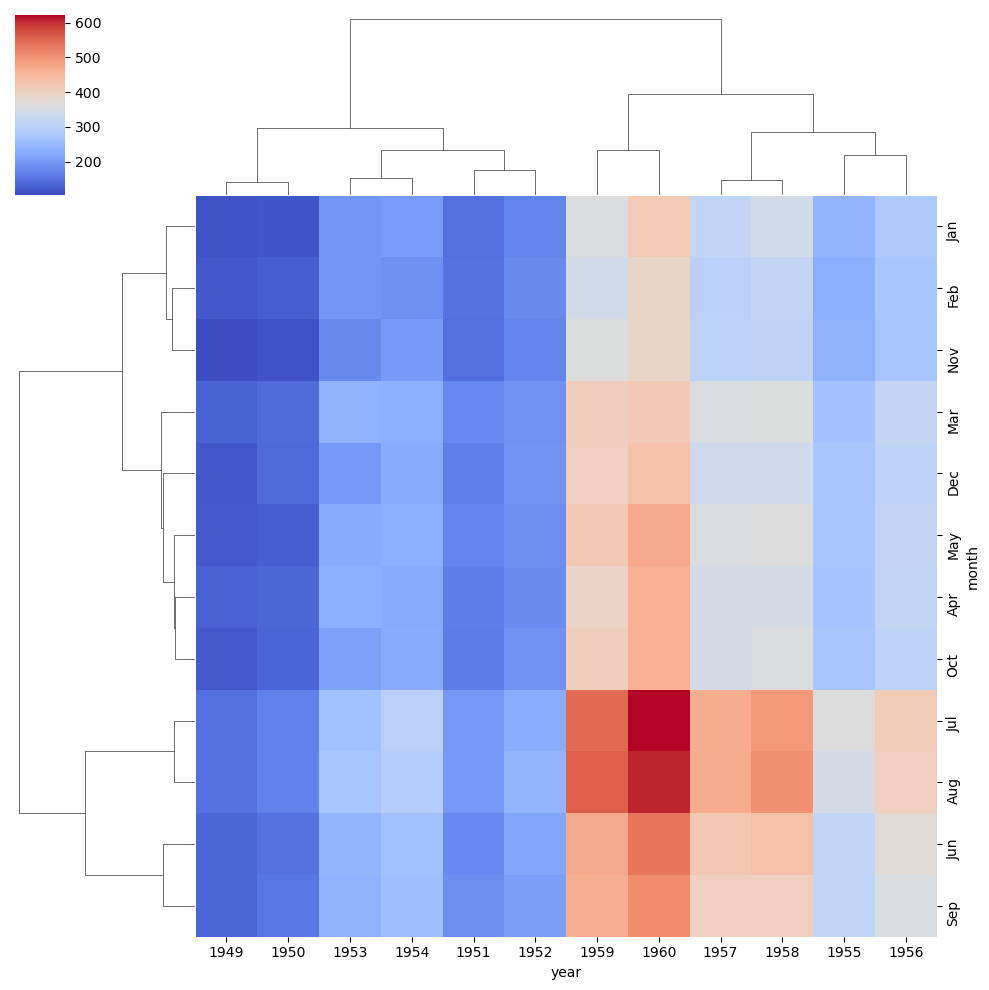

In [72]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm')

## Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [74]:
iris = sns.load_dataset('iris')

In [75]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

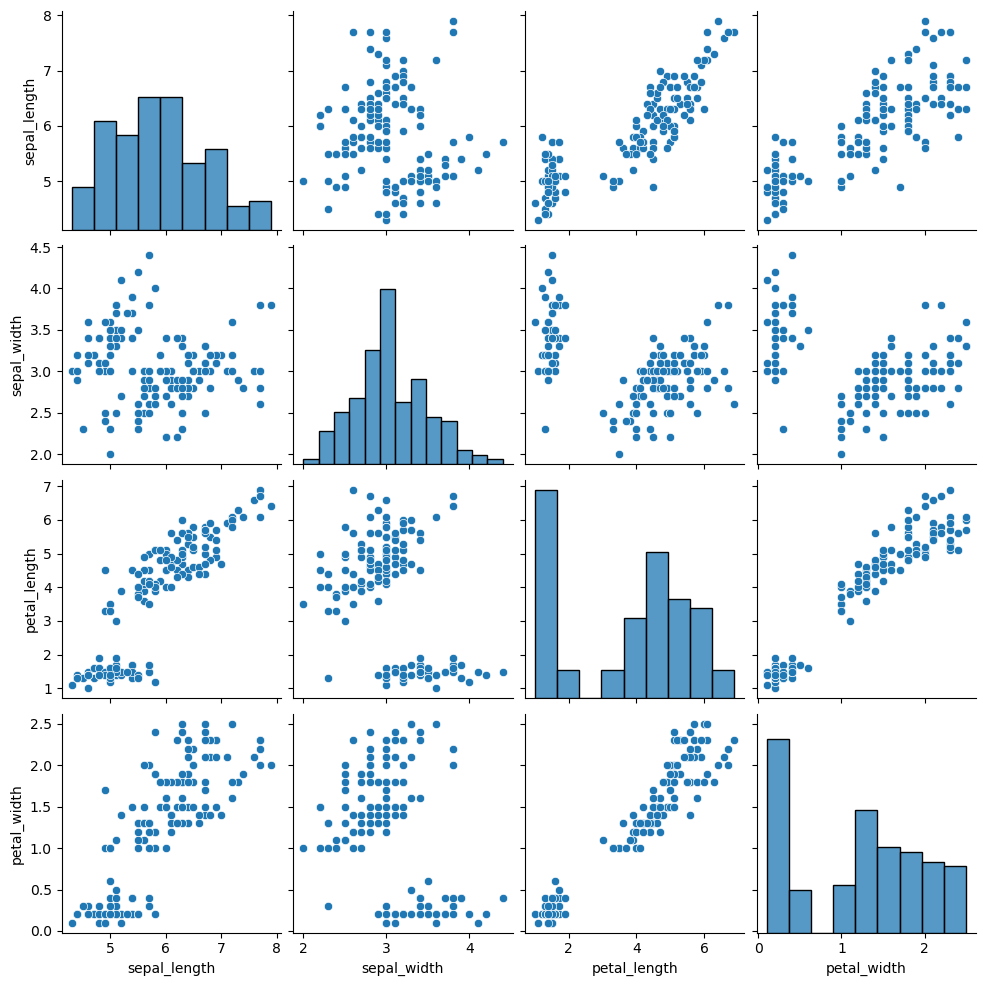

In [78]:
sns.pairplot(iris)

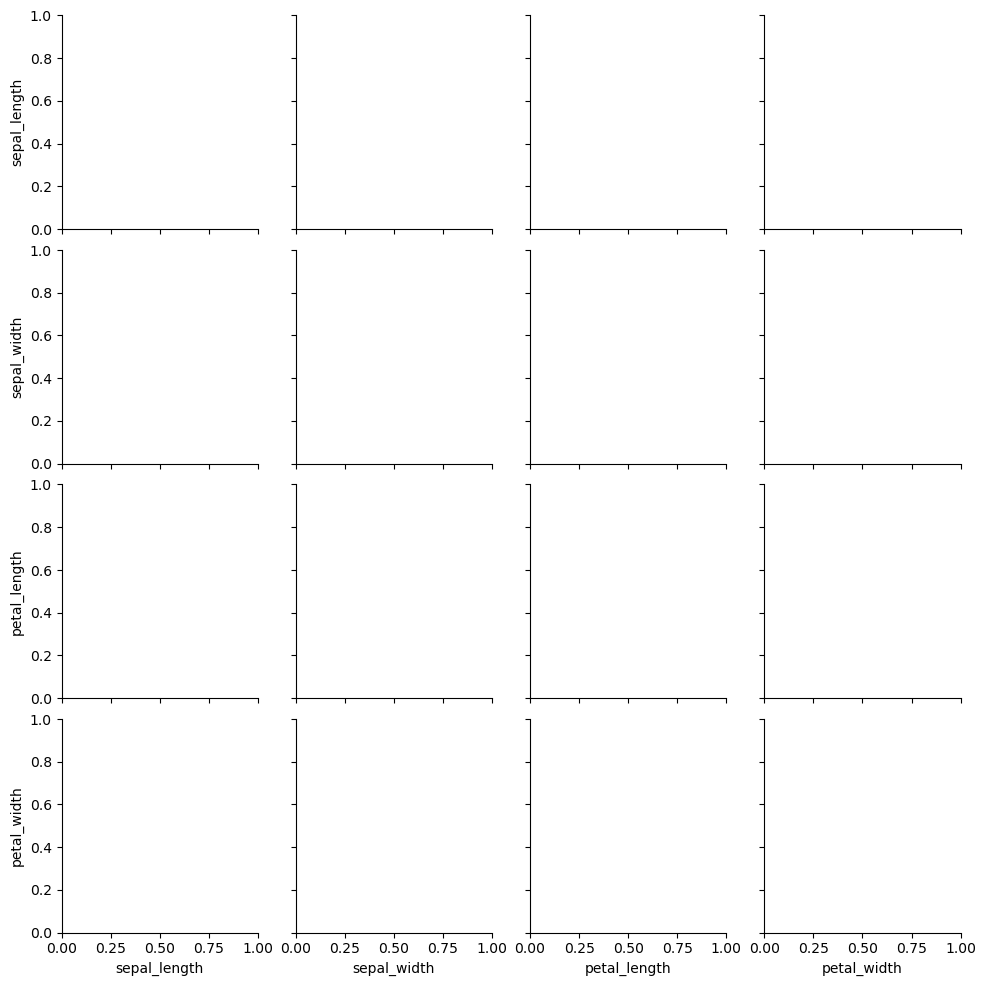

In [79]:
# Just the Grid
sns.PairGrid(iris)

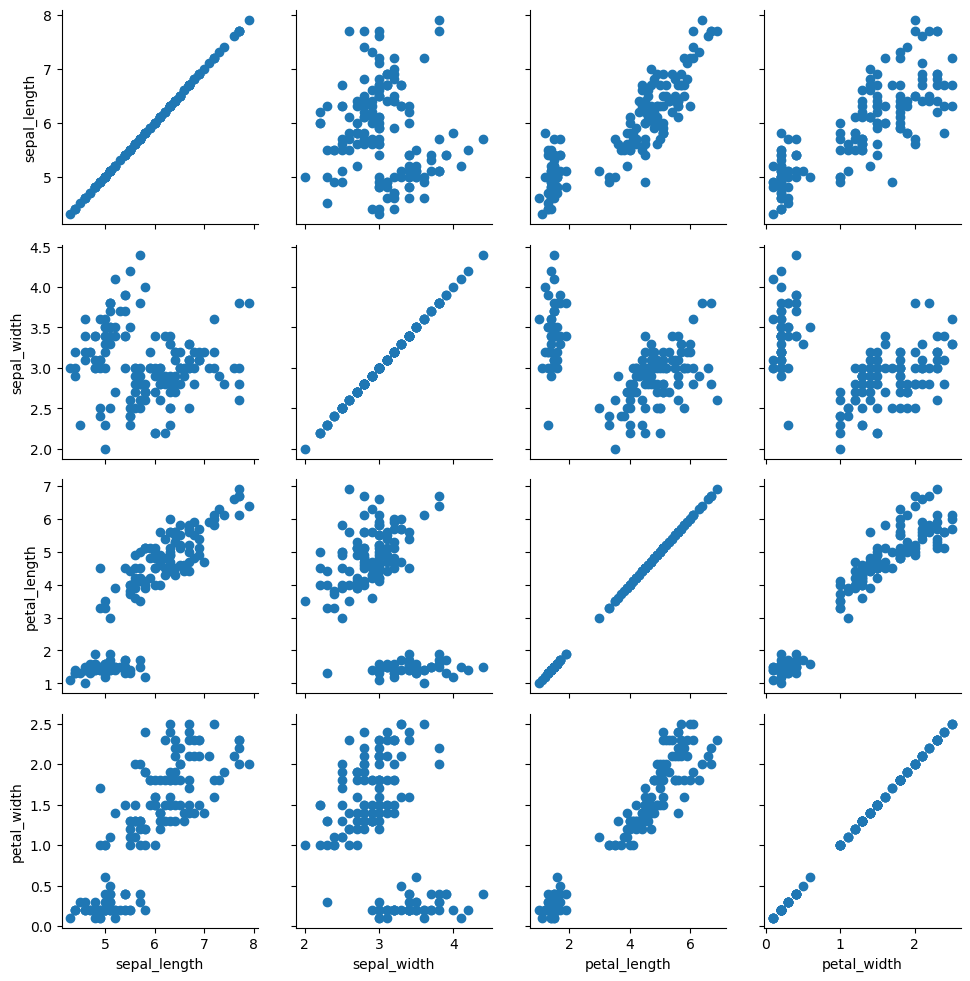

In [80]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

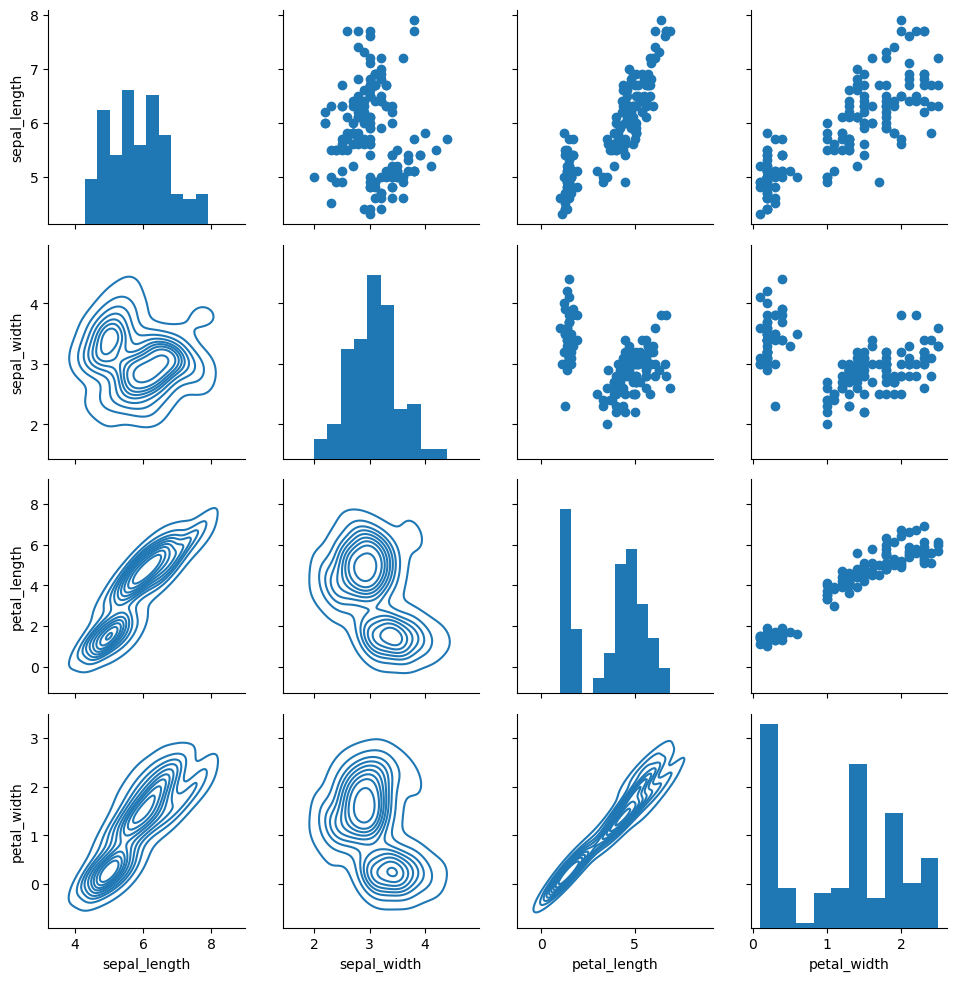

In [81]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

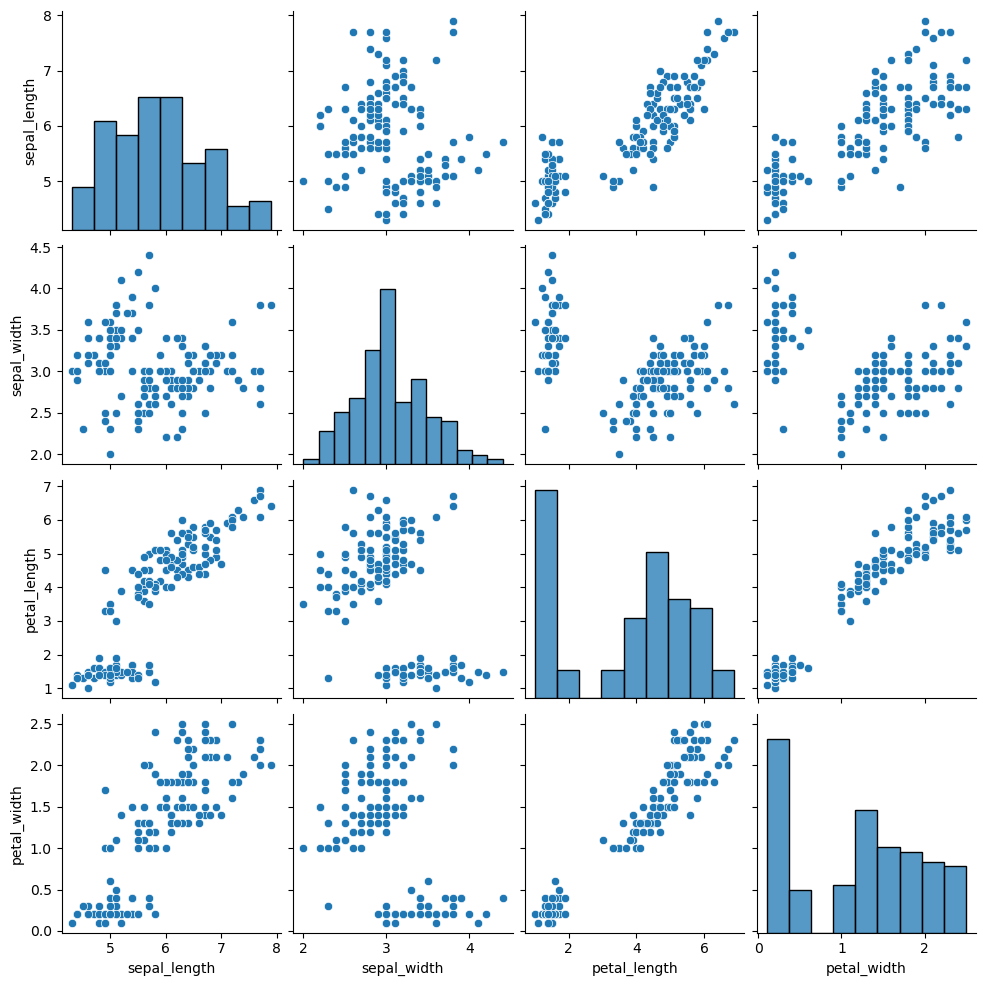

In [83]:
sns.pairplot(iris)

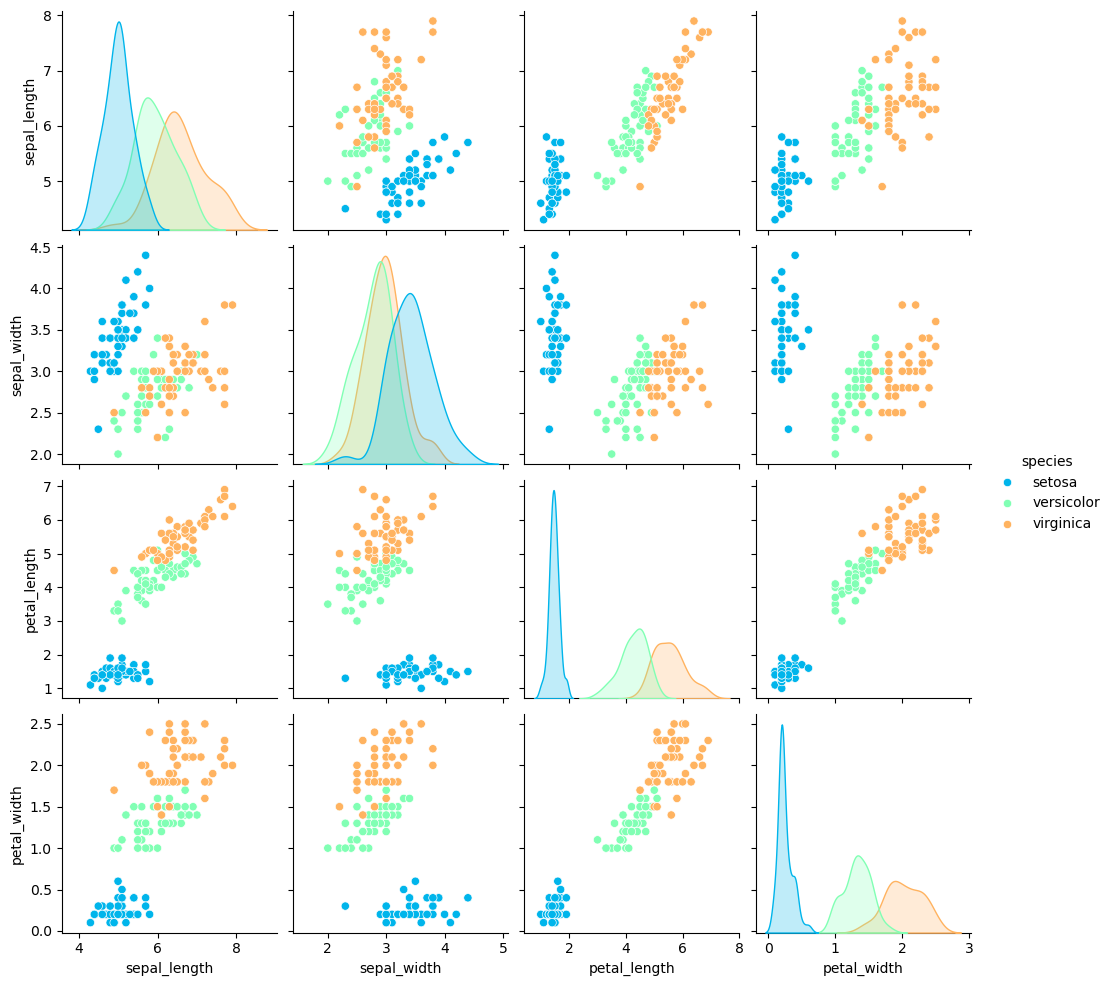

In [84]:
sns.pairplot(iris,hue='species',palette='rainbow')

### Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

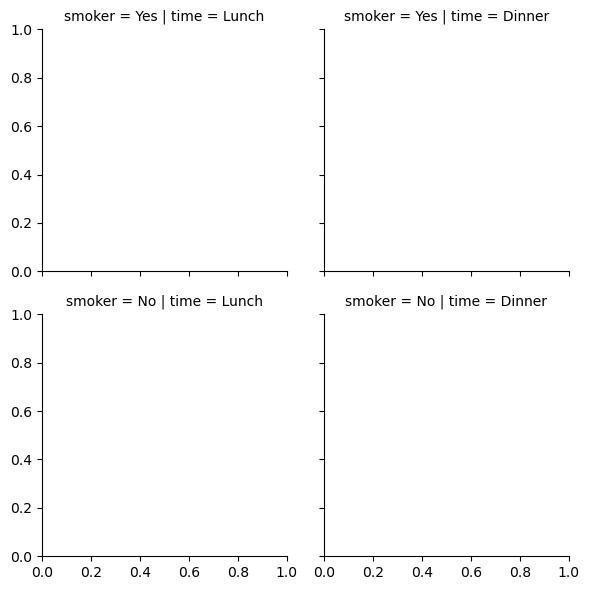

In [86]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

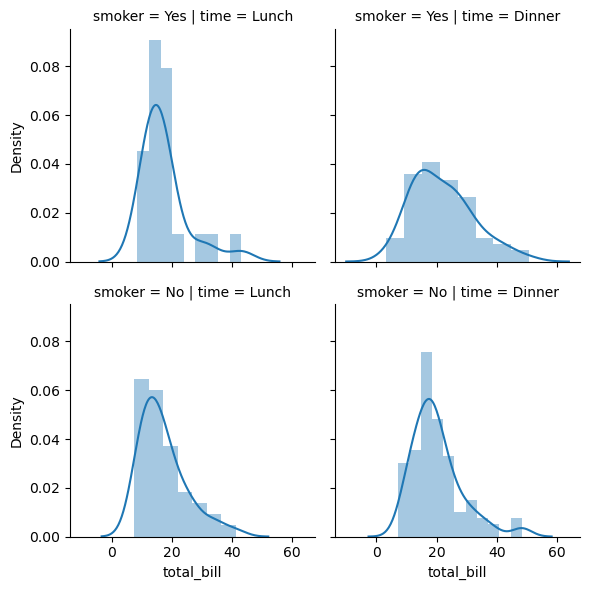

In [87]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(sns.distplot, 'total_bill')

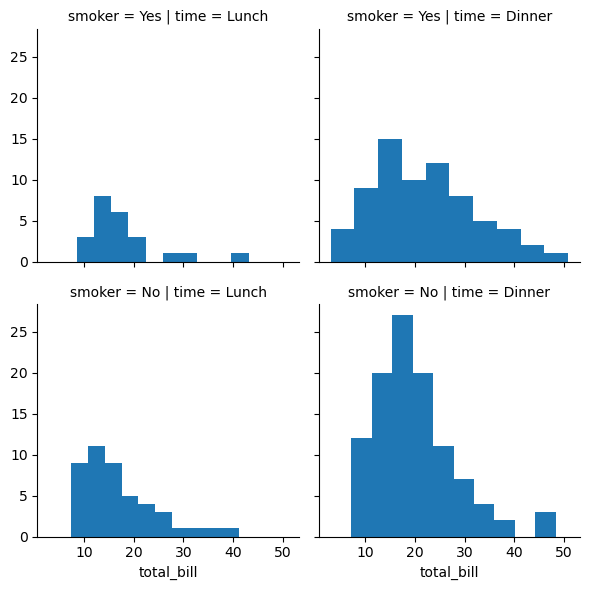

In [88]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g.map(plt.hist, "total_bill")

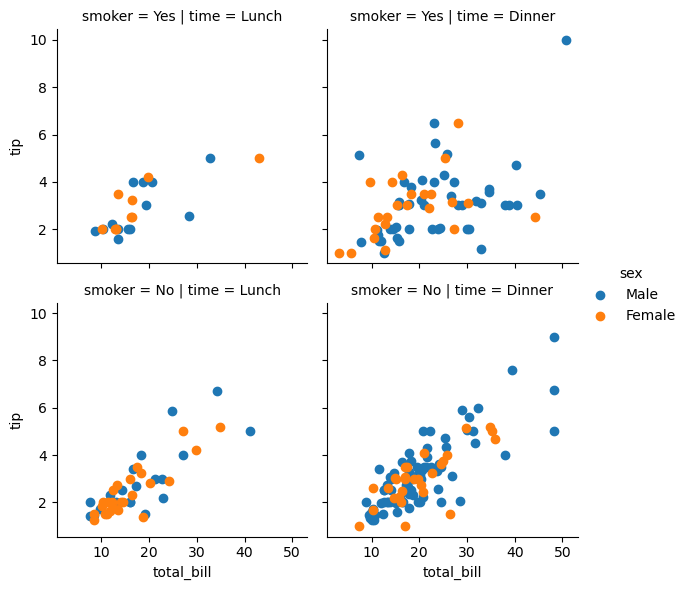

In [89]:
g = sns.FacetGrid(tips, col="time",  row="smoker", hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend() # notice how the arguments come after plt.scatter call

### JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

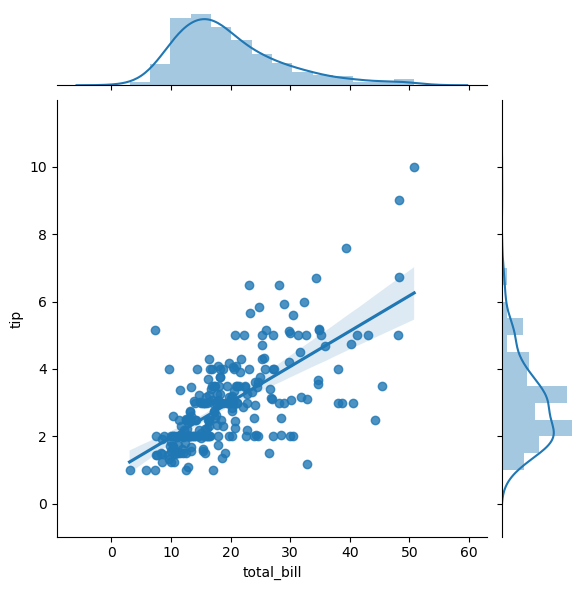

In [91]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

Reference Seaborn documentation as necessary for grid types, but most of the time you'll just use the easier plots discussed earlier.

## Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

#### lmplot()

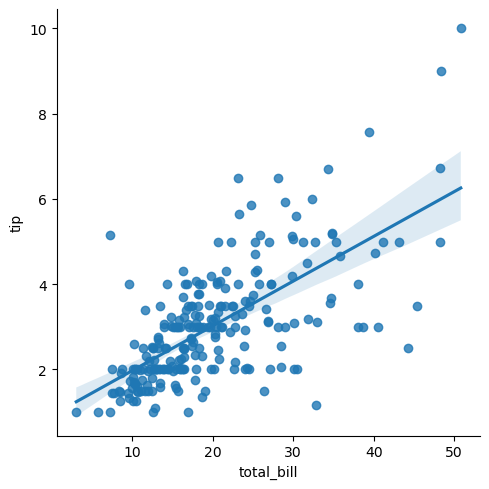

In [95]:
sns.lmplot(x='total_bill',y='tip',data=tips)

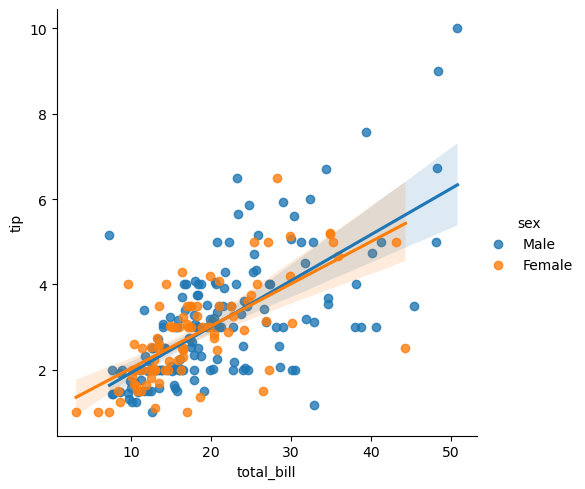

In [96]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

#### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

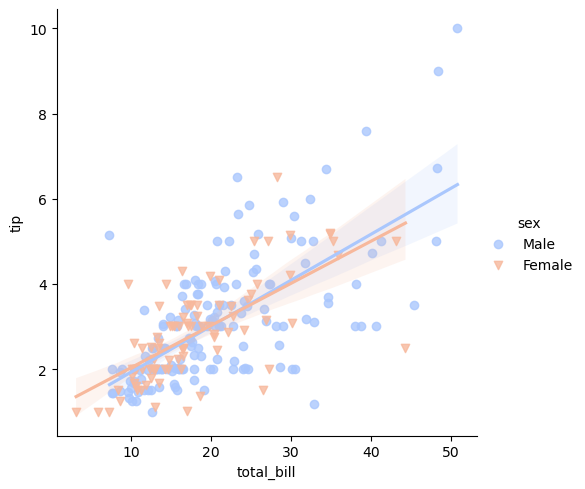

In [98]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'])

Seaborn and Matplotlib support a variety of markers, such as:
* 'o' for circles
* 'v' for triangles
* 's' for squares
* 'p' for pentagons
* '*' for stars
* 'D' for diamonds
* '+' for plus signs
* 'x' for cross signs

### Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

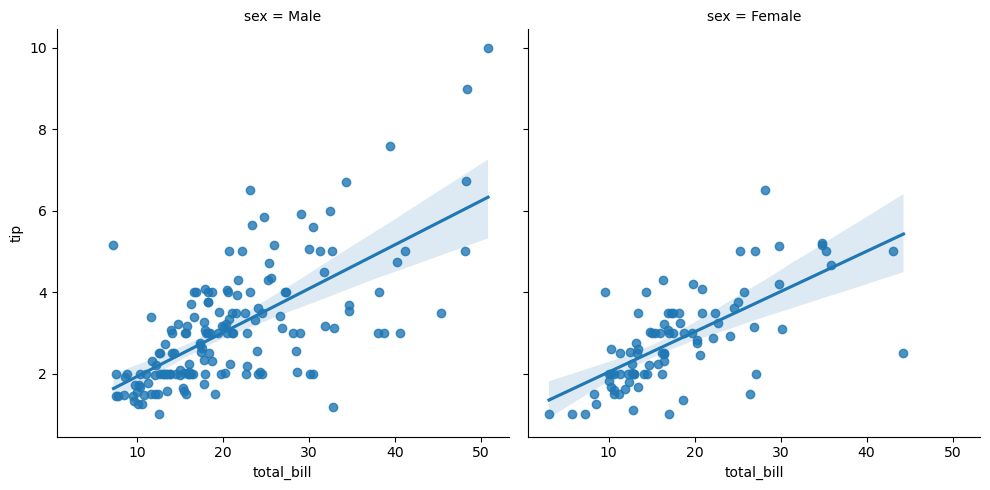

In [101]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

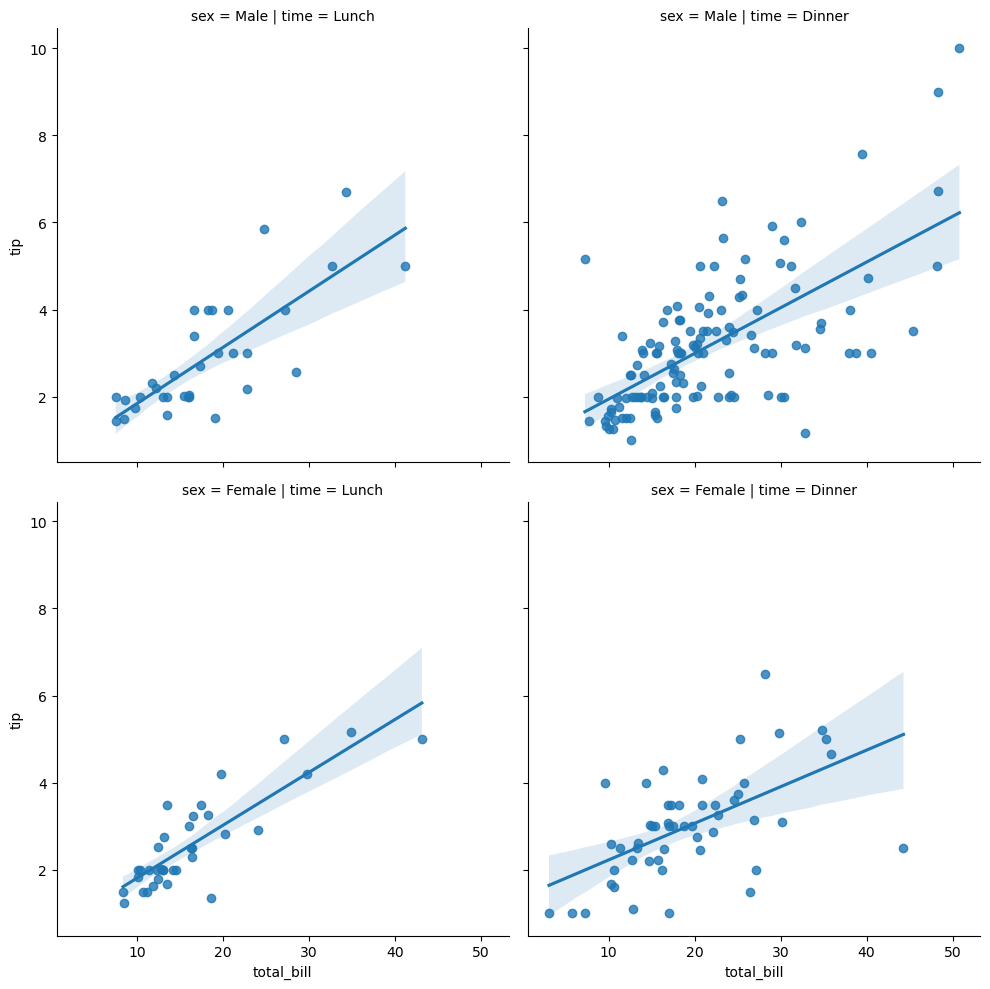

In [102]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

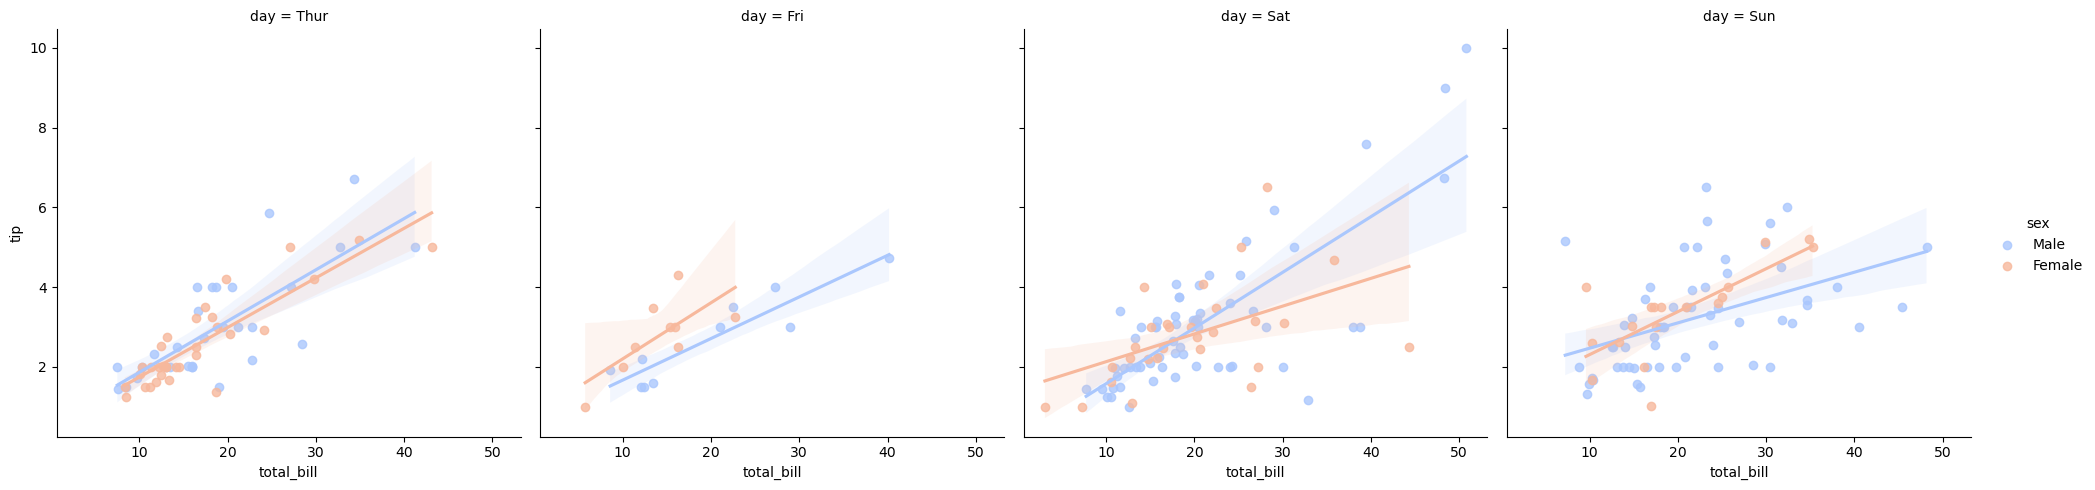

In [103]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

### Aspect and Height

Seaborn figures can have their size and aspect ratio adjusted with the **height** and **aspect** parameters:

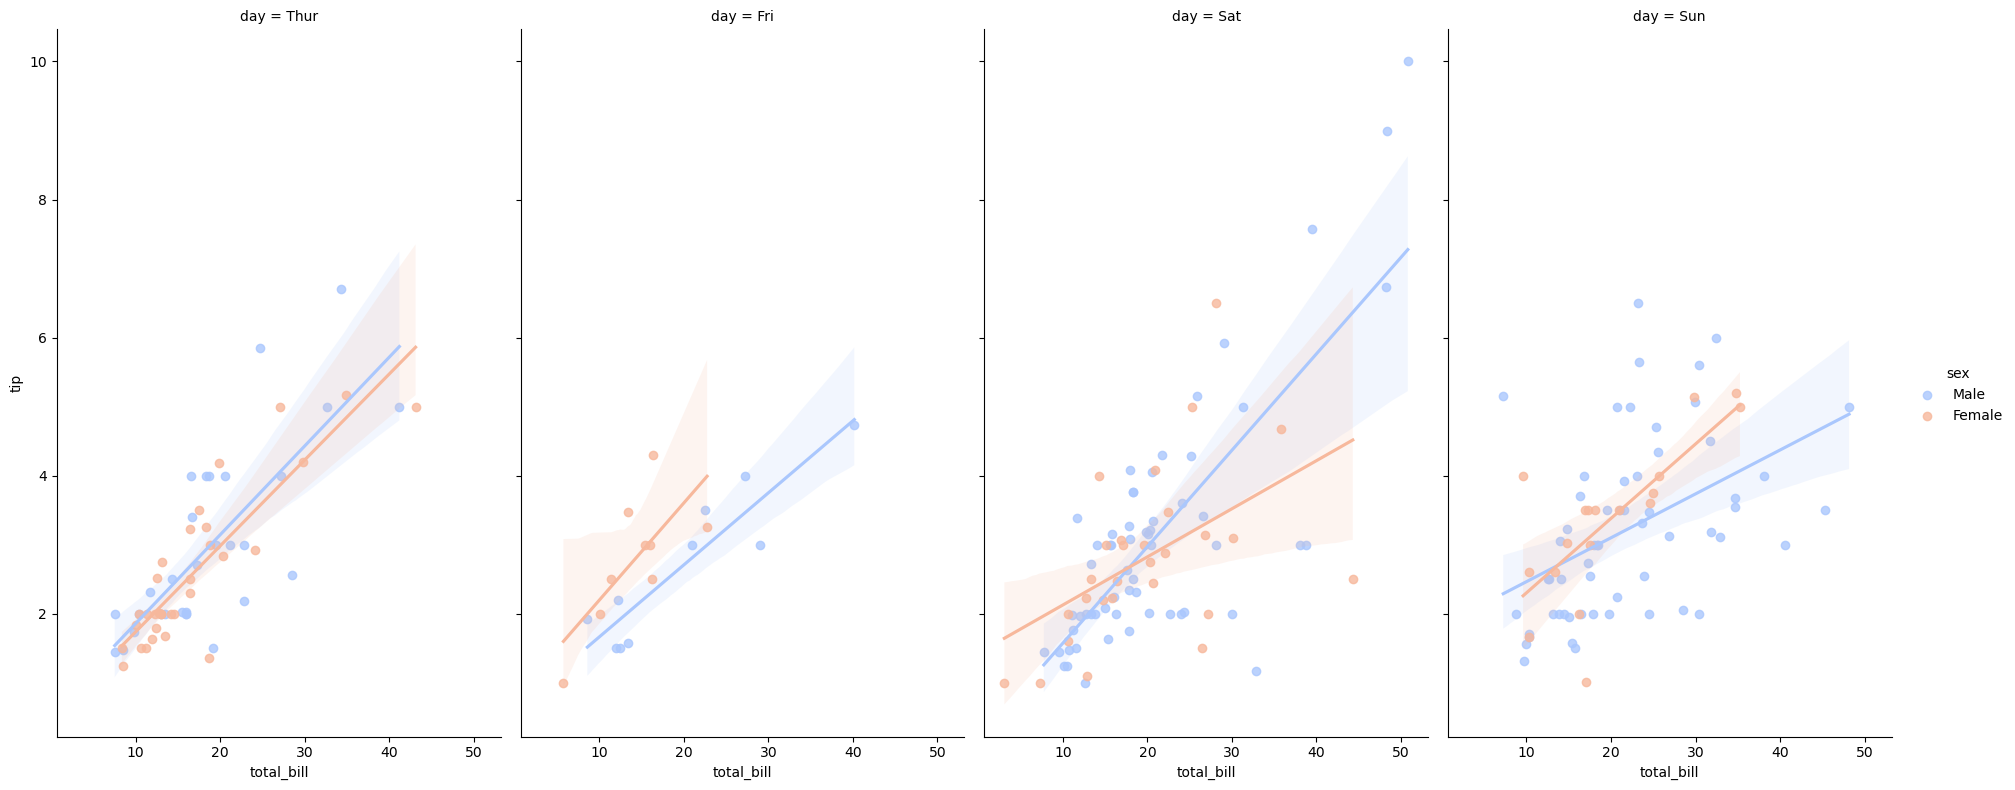

In [105]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', palette='coolwarm', aspect=0.6, height=8)

You're probably wondering how to change the font size or control the aesthetics even more, check out the Style and Color Lecture and Notebook for more info on that!

## Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

<Axes: xlabel='sex', ylabel='count'>

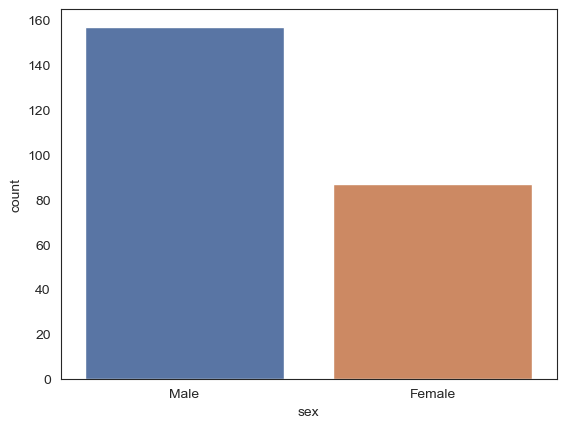

In [108]:
sns.set_style('white') # darkgrid, whitegrid, dark, white, ticks
sns.countplot(x='sex', data=tips, palette='deep')

<Axes: xlabel='sex', ylabel='count'>

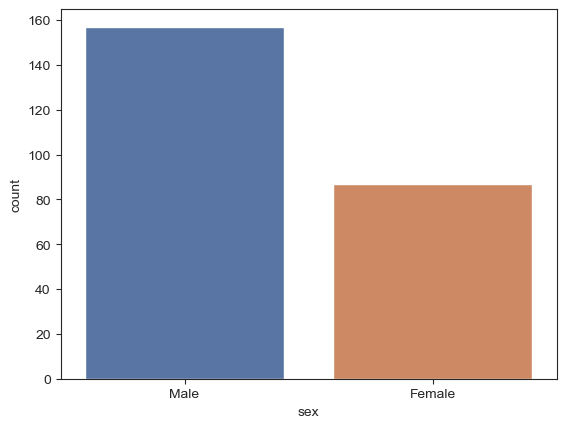

In [109]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

### Spine Removal

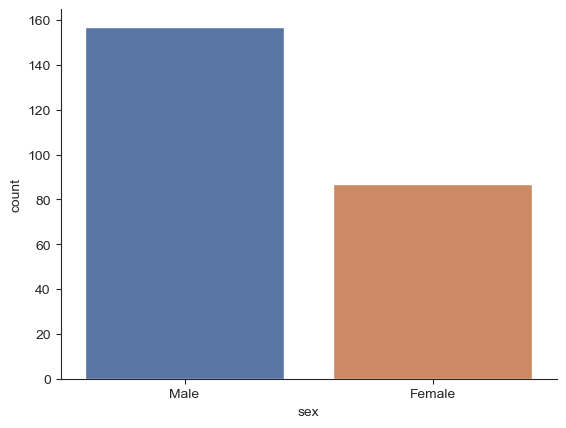

In [111]:
sns.countplot(x='sex',data=tips,palette='deep')
sns.despine()

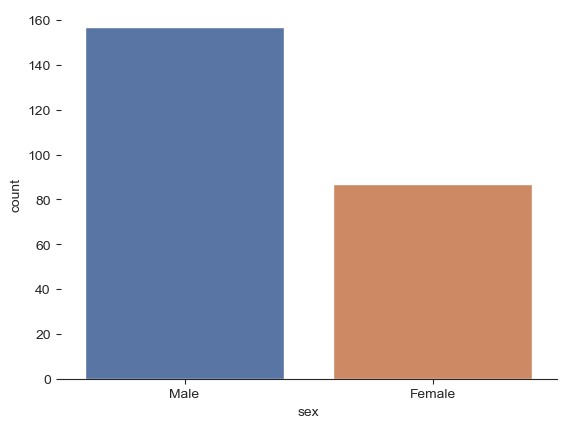

In [112]:
sns.countplot(x='sex',data=tips,palette='deep')
sns.despine(left=True)

### Size and Aspect
You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

<Axes: xlabel='sex', ylabel='count'>

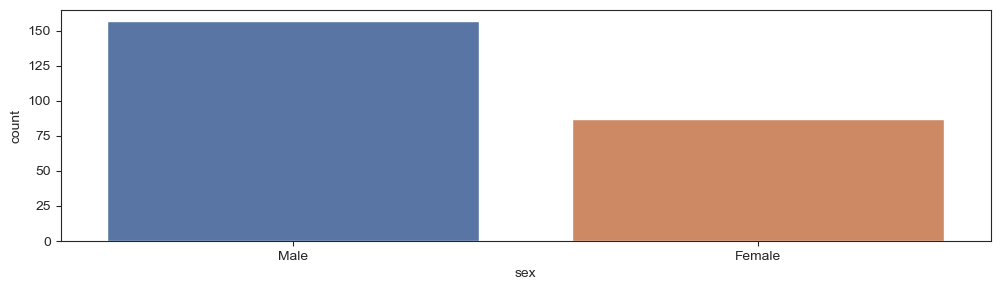

In [114]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex', data=tips, palette='deep')

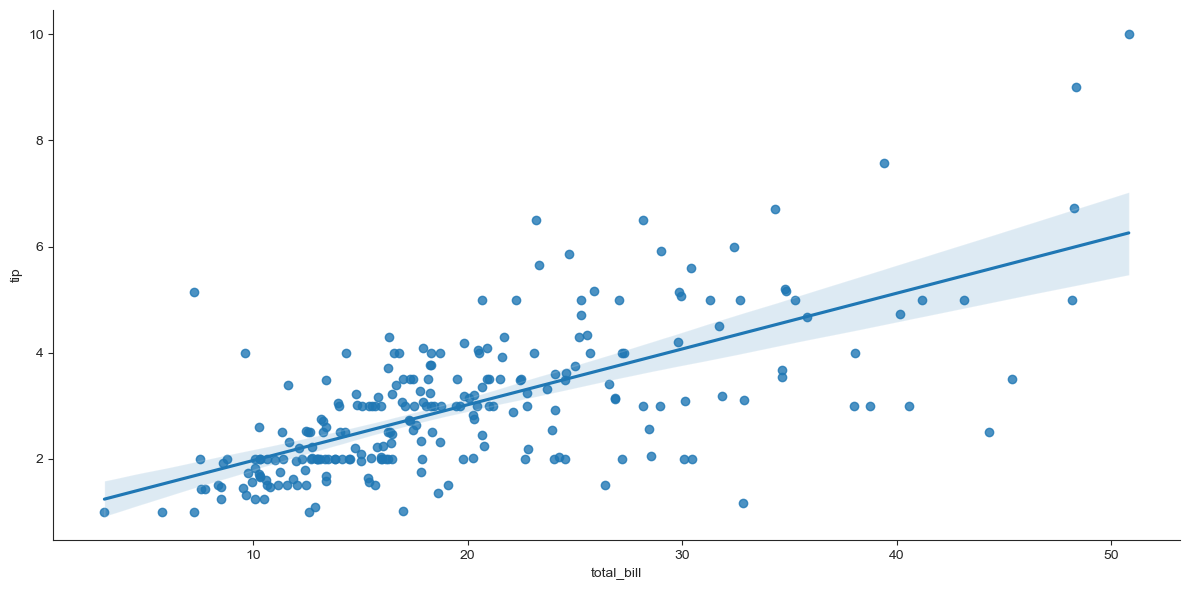

In [115]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',height=6,aspect=2,data=tips)

#### Context

The set_context() allows you to override default parameters:

<Axes: xlabel='sex', ylabel='count'>

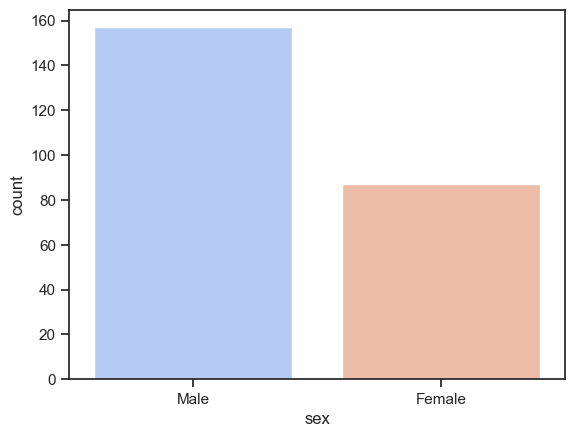

In [117]:
sns.set_context('notebook',font_scale=1) # paper, notebook, talk, poster
sns.countplot(x='sex',data=tips,palette='coolwarm')

Check out the documentation page for more info on these topics:
https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html